In [1]:
using PorousMaterials
using LightGraphs
using Printf
using Logging
using PyPlot

In [2]:
global_logger(SimpleLogger(stdout, Logging.Error))

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(0x00000032) open, 0 bytes waiting))), Info, Dict{Any,Int64}())

In [3]:
@eval PorousMaterials PATH_TO_CRYSTALS = "ddec_xtals"
@eval PorousMaterials PATH_TO_DATA = pwd()

"/home/sturlusa/my_projects/scratch/mpn_charges/build_graphs"

In [4]:
xtalnames = readdir("ddec_xtals")

2932-element Array{String,1}:
 "ABAVIJ_clean.cif"
 "ABAVOP_clean.cif"
 "ABEXIQ_clean.cif"
 "ABEXOW_clean.cif"
 "ABEXUC_clean.cif"
 "ABEYAJ_clean.cif"
 "ABEYIR.cif"
 "ABIYIV.cif"
 "ABUWOJ_clean.cif"
 "ACAKUM.cif"
 "ACALIB_clean.cif"
 "ACODED.cif"
 "ACOLIP_clean.cif"
 ⋮
 "ZILBAZ_clean.cif"
 "ZILBED_clean.cif"
 "ZIMJOW_clean.cif"
 "ZISYAD_clean.cif"
 "ZNGLUD01_clean.cif"
 "ZNGLUD_clean.cif"
 "ZURQOS_clean.cif"
 "Zn-DOBDC.cif"
 "ZnBDC.cif"
 "ZnBDCdabco.cif"
 "ZnHBDC.cif"
 "ZnMOF-74.cif"

In [5]:
mofs = []
#charges = Dict([mof => [] for mof in xtalnames])
cu_charges = Dict()
indices = Dict([mof => [] for mof in xtalnames])
for xtalname in xtalnames
    xtal = Crystal(xtalname)
    strip_numbers_from_atom_labels!(xtal)
    if !(:Cu in xtal.atoms.species)
        continue
    end
    
    infer_geometry_based_bonds!(xtal, true)
    asdf = [:N, :N, :O, :O]
    cu_indices = [i for i in 1:length(xtal.atoms.species) if xtal.atoms.species[i] == :Cu]
    for cu_idx in cu_indices
        cu_charges[xtalname] = unique(xtal.charges.q[cu_indices])
        if sort(xtal.atoms.species[neighbors(xtal.bonds, cu_idx)]) == asdf
            push!(mofs, xtalname)
            push!(indices[xtalname], cu_idx)
            #push!(charges[xtalname], xtal.charges.q[cu_idx[1]])
        end
    end
end
            
    

In [6]:
all_cu_charges = [cu_charges[x] for x in mofs]
all_cu_charges = [(all_cu_charges...)...]

1372-element Array{Float64,1}:
 0.861762
 0.865133
 0.865199
 0.861771
 0.865134
 0.865202
 0.861762
 0.865133
 0.865199
 0.861771
 0.865134
 0.865202
 0.861762
 ⋮
 0.678132
 0.667974
 0.678132
 0.667974
 0.678132
 0.667974
 0.678132
 0.667974
 0.678132
 0.667974
 0.678132
 0.667974

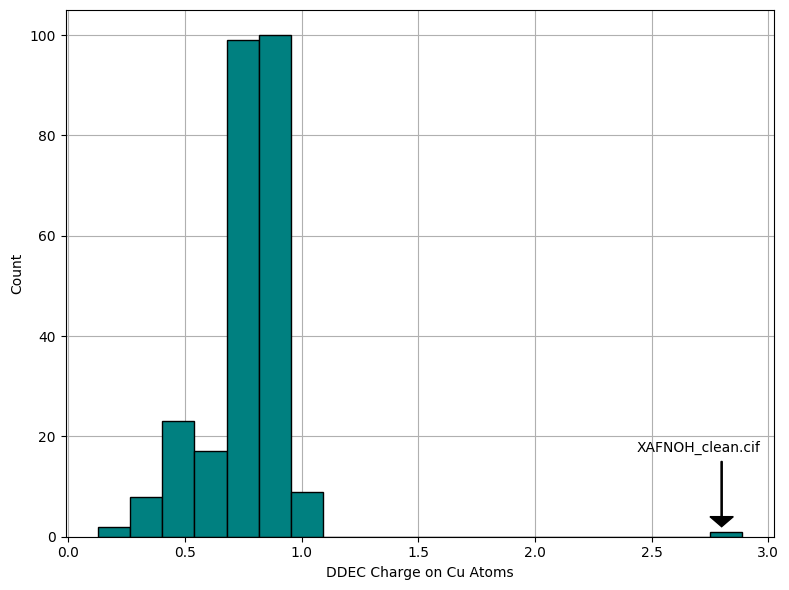

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(unique(all_cu_charges), bins=20, fc="teal", ec="k")
ax.set_xlabel("DDEC Charge on Cu Atoms")
ax.set_ylabel("Count")
#ax.set_title("All (Unique) Cu Atoms")
plt.arrow(2.8, 15, 0.0, -11, width=0.005, head_width=0.1,
    head_length=2.0, fc="k", ec="k", zorder=1000000)
plt.text(2.7, 17, "XAFNOH_clean.cif", ha="center")
ax.grid("on")
ax.set_axisbelow(true)
plt.tight_layout()
plt.savefig("outlier_investigation.png", dpi=300, format="png")
plt.show()